# **Computer Vision -  Conventional CNN Model A**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_path = "/content/drive/MyDrive/dataset"

In [3]:
train_data = "/content/drive/MyDrive/dataset/train"

In [4]:
test_data = "/content/drive/MyDrive/dataset/test"

In [5]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2424 files belonging to 3 classes.
Using 1940 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_data ,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 606 files belonging to 3 classes.
Using 121 files for validation.


In [7]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(180,180,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(4,activation='softmax'))

In [8]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [9]:
history = cnn.fit(train_ds,epochs=20,validation_data=val_ds)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


61/61 [==============================] - 223s 3s/step - loss: 5.6783 - accuracy: 0.3830 - val_loss: 1.5762 - val_accuracy: 0.3140
Epoch 2/20
61/61 [==============================] - 20s 323ms/step - loss: 0.9610 - accuracy: 0.5345 - val_loss: 1.3960 - val_accuracy: 0.4050
Epoch 3/20
61/61 [==============================] - 20s 323ms/step - loss: 0.7564 - accuracy: 0.6660 - val_loss: 1.2997 - val_accuracy: 0.3306
Epoch 4/20
61/61 [==============================] - 20s 322ms/step - loss: 0.6301 - accuracy: 0.7340 - val_loss: 0.9629 - val_accuracy: 0.5124
Epoch 5/20
61/61 [==============================] - 21s 329ms/step - loss: 0.5010 - accuracy: 0.7969 - val_loss: 1.2641 - val_accuracy: 0.4711
Epoch 6/20
61/61 [==============================] - 21s 337ms/step - loss: 0.4577 - accuracy: 0.8258 - val_loss: 1.6009 - val_accuracy: 0.4711
Epoch 7/20
61/61 [==============================] - 21s 332ms/step - loss: 0.3881 - accuracy: 0.8515 - val_loss: 1.5448 - val_accuracy: 0.5207
Epoch 8/20
6

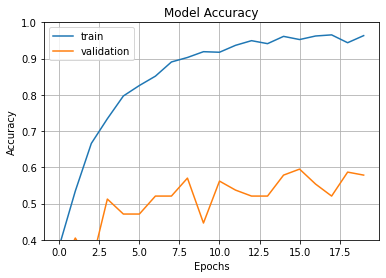

In [10]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [11]:
class_names = train_ds.class_names
print(class_names)

['cat', 'dog', 'rabbit']


In [12]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=cnn.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(3)}

In [13]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 25.3 MB/s 
     |████████████████████████████████| 1.1 MB 52.9 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 2.0 MB 42.7 MB/s 
     |████████████████████████████████| 84 kB 2.6 MB/s 
     |████████████████████████████████| 253 kB 53.0 MB/s 
     |████████████████████████████████| 212 kB 40.7 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 271 kB 50.5 MB/s 
     |████████████████████████████████| 144 kB 45.8 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 11.1 MB 42.4 MB/s 
     |████████████████████████████████| 80 kB 8.7 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 62 k

In [14]:
import gradio as gr

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://26531.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
